In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
import arviz as az
import matplotlib.pyplot as plt
import math

C:\Users\can2hr\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\can2hr\Anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
classify = pd.read_csv('https://media.githubusercontent.com/media/cnickol26/BigDataBowl2023/main/data_flipped.csv')

<ipython-input-2-5a06576d793d>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  classify = pd.read_csv('https://media.githubusercontent.com/media/cnickol26/BigDataBowl2023/main/data_flipped.csv')


In [3]:
## EDA looking at how to classify rush types
play1 = classify[classify['uniqueplayId'] == 2021091902389]
play1 = play1[play1['pff_positionLinedUp'].isin(['LT', 'RE'])]
play_data = play1[['team','new_x','new_y','o','frameId']]

In [6]:
output = play_data.groupby(['frameId']).apply(lambda x: math.dist([x['new_x'].iloc[0],x['new_y'].iloc[0]],[x['new_x'].iloc[1],x['new_y'].iloc[1]])).to_frame().reset_index().rename(columns = {0 :'tackle_end_dis'})
output

,frameId,tackle_end_dis
0,7,0.590000
1,8,0.640000
2,9,0.750067
3,10,0.900056
4,11,1.140000
5,12,1.470000
6,13,1.470000
7,14,1.330338
8,15,1.201499
9,16,1.079120


In [7]:
play_data.merge(output, on = 'frameId', how = 'left')

,team,new_x,new_y,o,frameId,tackle_end_dis
0,CLE,0.71,-3.57,71.97,7,0.590000
1,CLE,0.67,-3.58,74.92,8,0.640000
2,CLE,0.59,-3.59,76.01,9,0.750067
3,CLE,0.48,-3.61,73.45,10,0.900056
4,CLE,0.31,-3.64,66.96,11,1.140000
5,CLE,0.07,-3.67,67.85,12,1.470000
6,CLE,0.19,-3.69,65.35,13,1.470000
7,CLE,0.48,-3.73,62.79,14,1.330338
8,CLE,0.78,-3.77,61.21,15,1.201499
9,CLE,1.10,-3.86,62.01,16,1.079120


In [8]:
## creating a function to check if the players are looking at each other
def check_angle(x,y):
    if y > 180:
        y = y - 180
    else:
        y = 360 - (180 - y)
    if y < 15:
        top = y + 15
        bottom = 360 - (15 - y)
        if ((x <= top & x >=0) | (x >= bottom)):
            return 1
        else:
            return 0
    elif y > 345:
        top = 360 - y
        bottom = y - 15
        if ((x >= bottom) | (x <= top)):
            return 1
        else:
            return 0
    else:
        top = y + 15
        bottom = y - 15
        if ((x <= top) & (x >= bottom)):
            return 1
        else:
            return 0
        

In [9]:
check_angle(78, 266)

1

In [10]:
play_data.groupby(['frameId']).apply(lambda x: check_angle(x['o'].iloc[0].astype(int),x['o'].iloc[1].astype(int))).to_frame().reset_index().rename(columns = {0 :'facing_each_other'})

,frameId,facing_each_other
0,7,1
1,8,1
2,9,1
3,10,0
4,11,0
5,12,0
6,13,0
7,14,0
8,15,0
9,16,0


In [11]:
## EDA looking at speed
play2 = classify[classify['uniqueplayId'] == 20210919023392]
play2 = play2[play2['pff_positionLinedUp'].isin(['LT', 'REO'])]
play_data2 = play2[['team','new_x','new_y','o','frameId']]
play_data2

,team,new_x,new_y,o,frameId
731616,CLE,0.01,-6.34,234.69,6
731617,CLE,0.11,-6.33,230.35,7
731618,CLE,0.28,-6.32,244.42,8
731619,CLE,0.51,-6.32,241.57,9
731620,CLE,0.78,-6.29,238.02,10
731621,CLE,1.12,-6.26,228.60,11
731622,CLE,1.51,-6.21,237.27,12
731623,CLE,1.93,-6.16,241.07,13
731624,CLE,2.41,-6.08,244.73,14
731625,CLE,2.94,-5.98,233.73,15


In [12]:
output2 = play_data2.groupby(['frameId']).apply(lambda x: math.dist([x['new_x'].iloc[0],x['new_y'].iloc[0]],[x['new_x'].iloc[1],x['new_y'].iloc[1]])).to_frame().reset_index().rename(columns = {0 :'tackle_end_dis'})
output2

,frameId,tackle_end_dis
0,6,3.394775
1,7,3.353357
2,8,3.272996
3,9,3.186989
4,10,3.054128
5,11,2.918150
6,12,2.712656
7,13,2.504496
8,14,2.253619
9,15,1.982448


In [13]:
play_data2.merge(output, on = 'frameId', how = 'left')

,team,new_x,new_y,o,frameId,tackle_end_dis
0,CLE,0.01,-6.34,234.69,6,NaN
1,CLE,0.11,-6.33,230.35,7,0.590000
2,CLE,0.28,-6.32,244.42,8,0.640000
3,CLE,0.51,-6.32,241.57,9,0.750067
4,CLE,0.78,-6.29,238.02,10,0.900056
5,CLE,1.12,-6.26,228.60,11,1.140000
6,CLE,1.51,-6.21,237.27,12,1.470000
7,CLE,1.93,-6.16,241.07,13,1.470000
8,CLE,2.41,-6.08,244.73,14,1.330338
9,CLE,2.94,-5.98,233.73,15,1.201499


In [14]:
play_data2.groupby(['frameId']).apply(lambda x: check_angle(x['o'].iloc[0].astype(int),x['o'].iloc[1].astype(int))).to_frame().reset_index().rename(columns = {0 :'facing_each_other'})

,frameId,facing_each_other
0,6,1
1,7,1
2,8,1
3,9,1
4,10,1
5,11,1
6,12,1
7,13,1
8,14,0
9,15,1


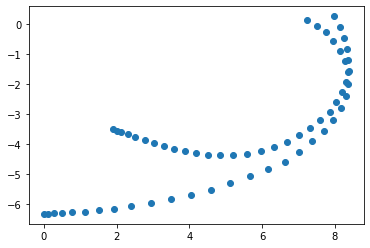

In [15]:
## Speed rush play from animations
plt.scatter(play_data2['new_x'],play_data2['new_y'])

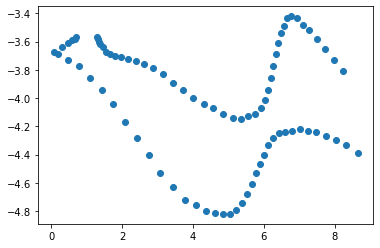

In [16]:
## Power/bull rush play from animations
plt.scatter(play_data['new_x'],play_data['new_y'])

In [17]:
play3 = classify[classify['uniqueplayId'] == 20210909003862]
play3 = play3[play3['pff_positionLinedUp'].isin(['LT', 'ROLB'])]
play_data3 = play3[['team','new_x','new_y','o','frameId','pff_positionLinedUp']]
play_data3

,team,new_x,new_y,o,frameId,pff_positionLinedUp
701499,DAL,0.63,-6.18,249.91,7,ROLB
701500,DAL,0.50,-6.11,261.85,8,ROLB
701501,DAL,0.32,-6.01,266.66,9,ROLB
701502,DAL,0.08,-5.89,281.35,10,ROLB
701503,DAL,0.22,-5.71,291.64,11,ROLB
701504,DAL,0.53,-5.46,300.31,12,ROLB
701505,DAL,0.87,-5.20,303.47,13,ROLB
701506,DAL,1.21,-4.88,305.63,14,ROLB
701507,DAL,1.55,-4.56,305.63,15,ROLB
701508,DAL,1.90,-4.17,307.63,16,ROLB


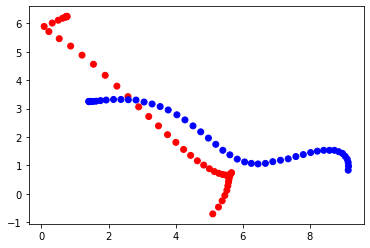

In [52]:
colors = {'LT':'Blue','ROLB':'Red'}
plt.scatter(play_data3['new_x'],play_data3['new_y'], c = play_data3['pff_positionLinedUp'].map(colors))

In [48]:
classify['uniqueplayId'][2000]

20210909003862

In [12]:
plays = pd.read_csv('https://media.githubusercontent.com/media/cnickol26/BigDataBowl2023/main/nfl-big-data-bowl-2023/plays.csv')
plays[(plays['gameId'] == 2021090900) & (plays['playId'] == 3862)]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
76,2021090900,3862,(8:56) (Shotgun) T.Brady pass short right to L...,4,2,4,TB,DAL,DAL,41,...,NaN,69.0,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man


In [5]:
play_data3.groupby(['frameId']).apply(lambda x: math.dist([x['new_x'].iloc[0],x['new_y'].iloc[0]],[x['new_x'].iloc[1],x['new_y'].iloc[1]])).to_frame().reset_index().rename(columns = {0 :'tackle_end_dis'})

,frameId,tackle_end_dis
0,7,3.068061
1,8,3.065844
2,9,3.086503
3,10,3.182860
4,11,3.071970
5,12,2.822269
6,13,2.555484
7,14,2.255770
8,15,2.012213
9,16,1.726297


## Looking at speed/ distance traveled

In [24]:
## Power play
play_data = play1[['team','new_x','new_y','o','frameId','pff_positionLinedUp','s','dis']]
play_data['mph'] = play_data['s'] * 2.045

<ipython-input-24-83ff48bda613>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_data['mph'] = play_data['s'] * 2.045


In [25]:
## Total distance traveled
play_data.groupby(['pff_positionLinedUp'])['dis'].sum()

pff_positionLinedUp
LT    7.33
RE    9.65
Name: dis, dtype: float64

In [30]:
## Max speed (s is yards/sec)
play_data.groupby(['pff_positionLinedUp'])[['s','mph']].max().reset_index()

,pff_positionLinedUp,s,mph
0,LT,2.86,5.8487
1,RE,3.48,7.1166


In [31]:
## Speed play
play_data2 = play2[['team','new_x','new_y','o','frameId','pff_positionLinedUp','s','dis']]
play_data2['mph'] = play_data2['s'] * 2.045

<ipython-input-31-e40c2a07713e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_data2['mph'] = play_data2['s'] * 2.045


In [32]:
## Total distance traveled
play_data2.groupby(['pff_positionLinedUp'])['dis'].sum()

pff_positionLinedUp
LT      9.96
REO    12.76
Name: dis, dtype: float64

In [33]:
## Max speed (s is yards/sec)
play_data2.groupby(['pff_positionLinedUp'])[['s','mph']].max().reset_index()

,pff_positionLinedUp,s,mph
0,LT,3.83,7.83235
1,REO,5.58,11.41110
